# Decision Tree for Regression

Create a regression tree using sklearn for a data set with one feature

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import tree
from sklearn import metrics

In [3]:
df = pd.DataFrame({'Dosage': [5, 7, 8, 10, 15, 20, 26, 28, 30, 32, 33, 36, 38, 39, 40, 
                              41, 42, 44, 46, 47, 50, 51, 52, 54, 58, 60, 62, 65, 66, 68, 
                              69, 71, 72, 75, 76, 77, 78, 80, 81, 84, 86, 87, 88, 90, 91, 
                              93, 94, 97, 99, 100],
                   'Effectiveness': [7, 1, 2, 7, 10, 5, 8 , 5, 11, 12, 9, 7, 11, 7, 10, 98, 
                                     97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 82, 79, 
                                     78, 75, 80, 67, 69, 64, 67, 62, 63, 60, 5, 2, 10, 1, 5, 
                                     6, 2, 3, 1, 1, 2, 6 ]})

In [4]:
df

,Dosage,Effectiveness
0,5,7
1,7,1
2,8,2
3,10,7
4,15,10
5,20,5
6,26,8
7,28,5
8,30,11
9,32,12


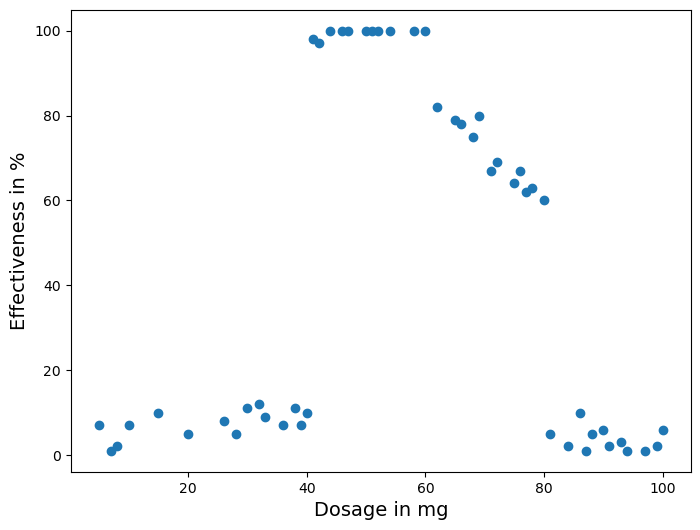

In [5]:
plt.figure(figsize=(8, 6))

plt.scatter(df.Dosage, df.Effectiveness)
plt.xlabel('Dosage in mg', fontsize=14)
plt.ylabel('Effectiveness in %', fontsize=14);

In [6]:
# Define the feature and target variables for training

X = df[['Dosage']]
y = df['Effectiveness']

In [7]:
# Instantiate a Regression Tree from sklarn and fit it on the data set

regressor = tree.DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [8]:
# What is the predicted effectiveness for a dosage of 30mg?

regressor.predict([[30]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([11.])

In [9]:
df['Predicted Effectiveness'] = regressor.predict(X)
df.head(10)

,Dosage,Effectiveness,Predicted Effectiveness
0,5,7,7.0
1,7,1,1.0
2,8,2,2.0
3,10,7,7.0
4,15,10,10.0
5,20,5,5.0
6,26,8,8.0
7,28,5,5.0
8,30,11,11.0
9,32,12,12.0


In [10]:
print(metrics.mean_squared_error(y, regressor.predict(X)))

0.0


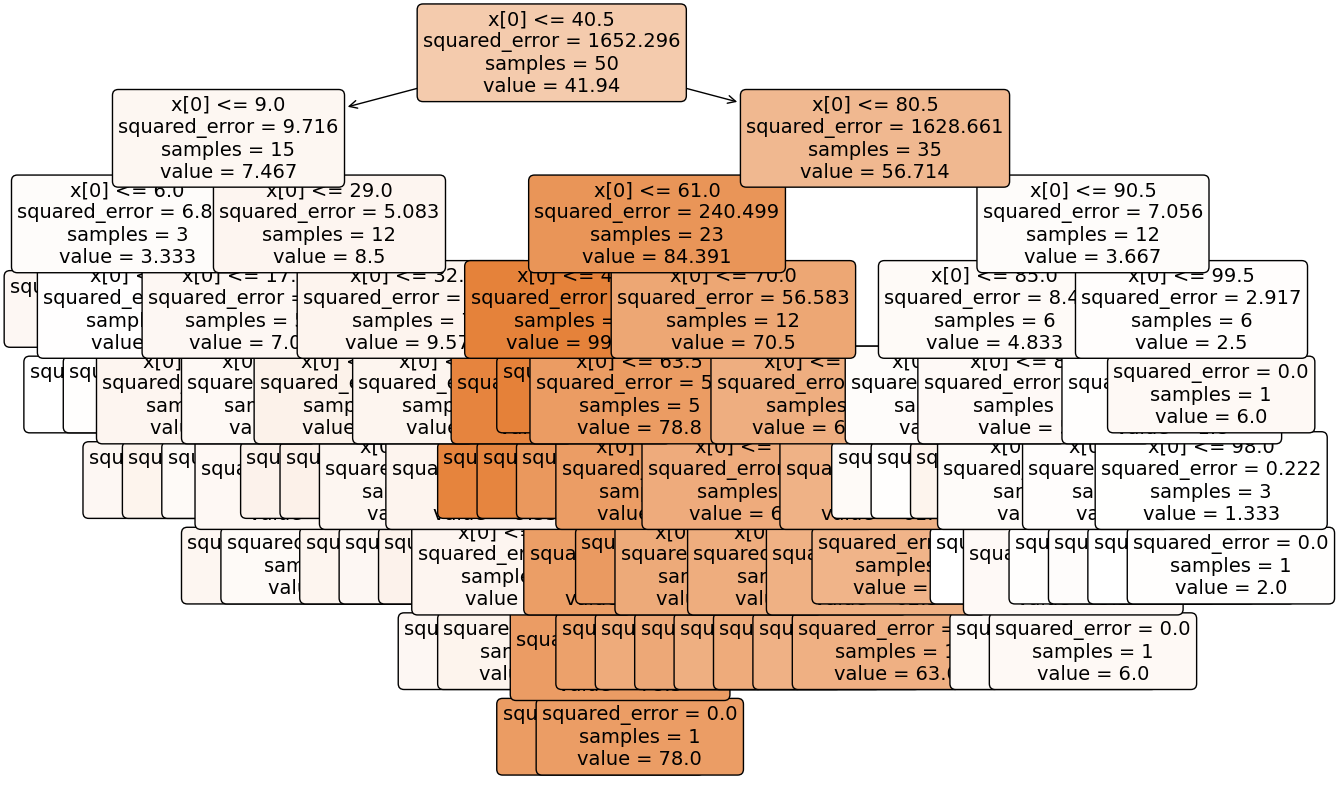

In [11]:
plt.figure(figsize=(15,10))

tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


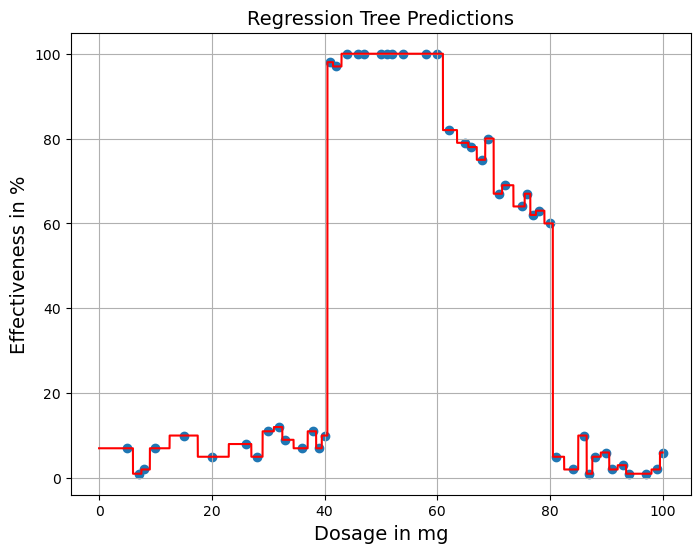

In [12]:
plt.figure(figsize=(8, 6))

plt.scatter(X, y)

domain = np.arange(0, 100, 0.01)
domain = domain.reshape((len(domain)),1)
plt.plot(domain, regressor.predict(domain), color = 'red')

plt.xlabel('Dosage in mg', fontsize=14)
plt.ylabel('Effectiveness in %', fontsize=14);
plt.title('Regression Tree Predictions', fontsize=14)
plt.grid();

In [13]:
regressor = tree.DecisionTreeRegressor(min_samples_split=15)
regressor.fit(X, y)

DecisionTreeRegressor(min_samples_split=15)

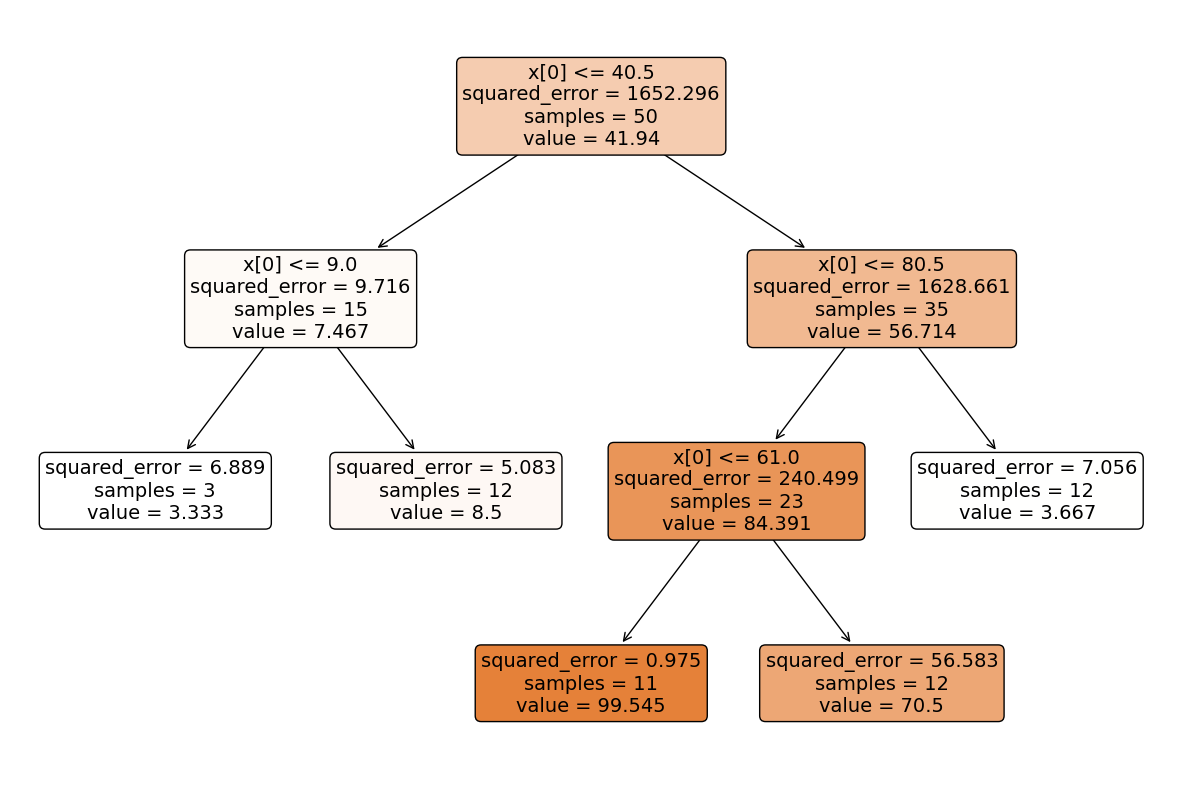

In [14]:
plt.figure(figsize=(15,10))

tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);

In [15]:
print(metrics.mean_squared_error(y, regressor.predict(X)))

# this is a weighted average of the squared_error in the leaves

17.12121212121212


In [16]:
from math import sqrt

print(sqrt(metrics.mean_squared_error(y, regressor.predict(X))))

4.1377786457484795


In [17]:
regressor.get_depth()

3

In [18]:
regressor.get_n_leaves()

5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


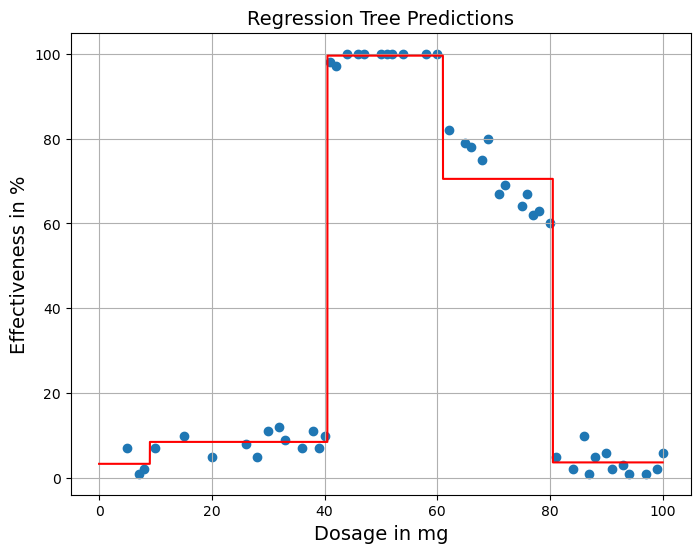

In [19]:
plt.figure(figsize=(8, 6))

plt.scatter(X, y)

domain = np.arange(0, 100, 0.01)
domain = domain.reshape((len(domain)),1)
plt.plot(domain, regressor.predict(domain), color = 'red')

plt.xlabel('Dosage in mg', fontsize=14)
plt.ylabel('Effectiveness in %', fontsize=14);
plt.title('Regression Tree Predictions', fontsize=14)
plt.grid();

### Homework - 6

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import tree

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [22]:
# 1. Import dataset and inspect
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


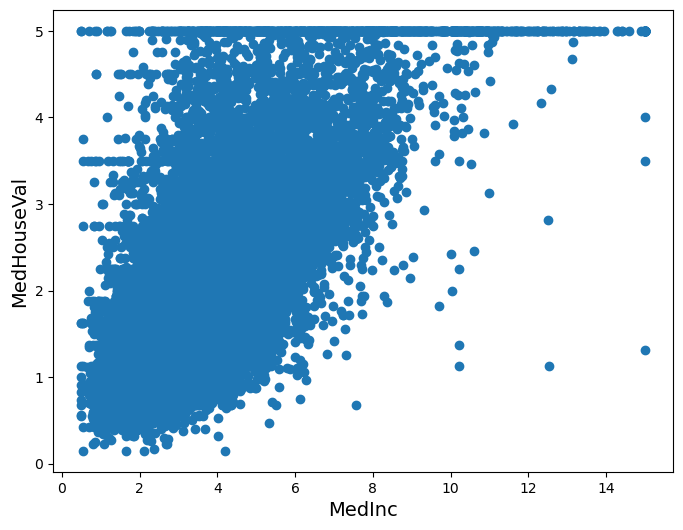

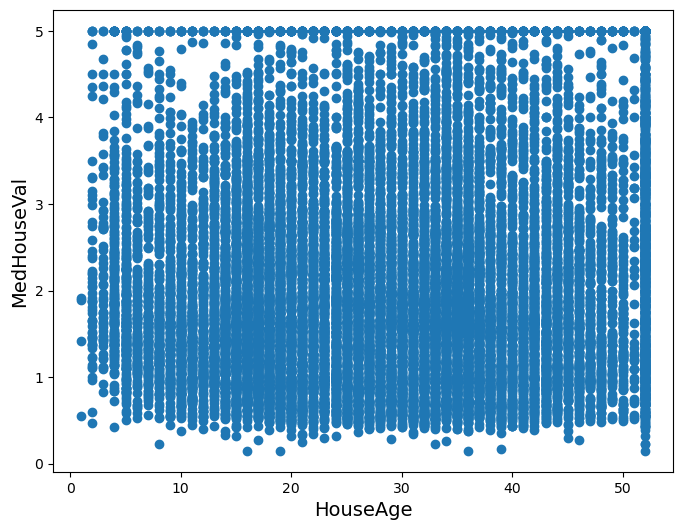

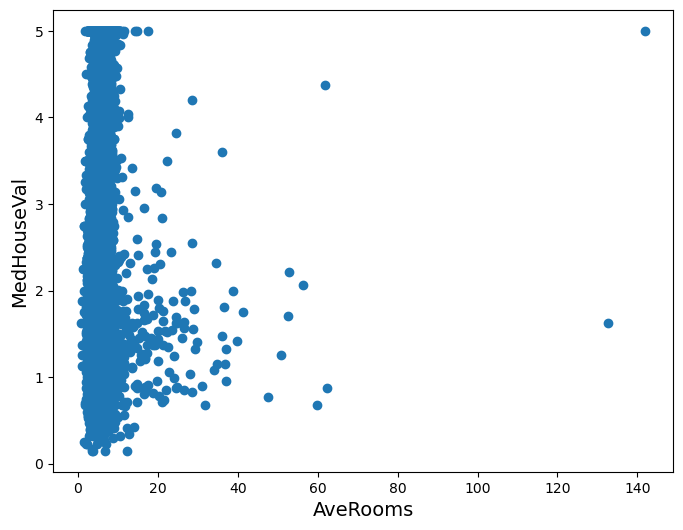

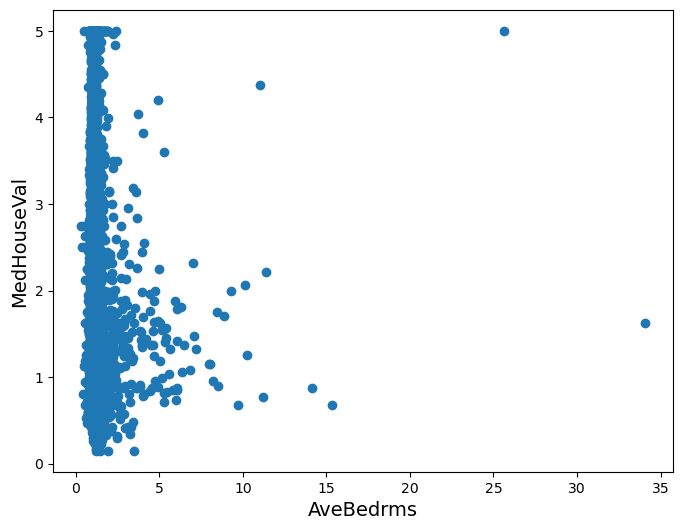

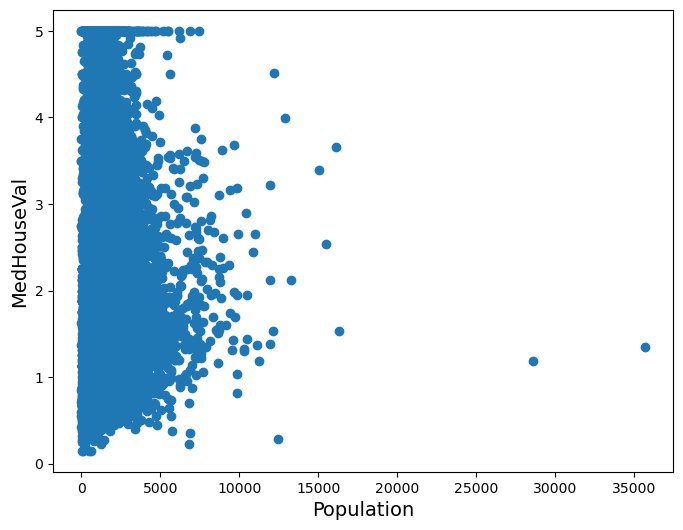

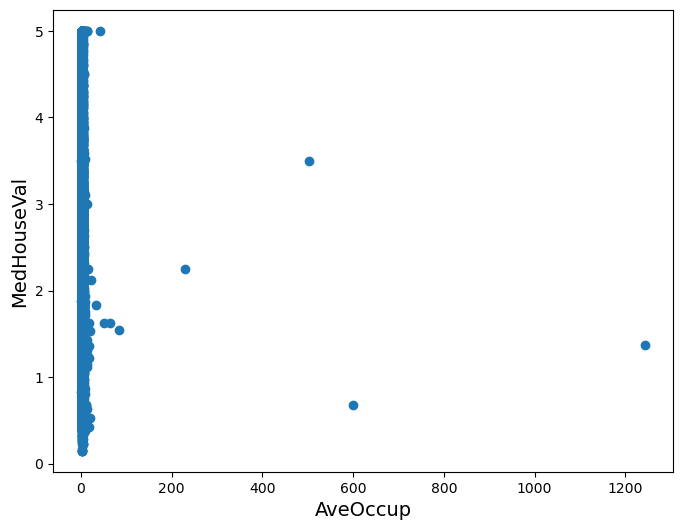

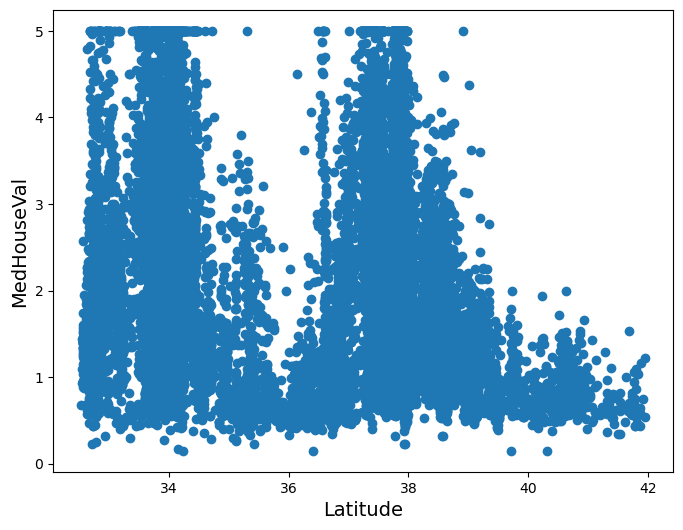

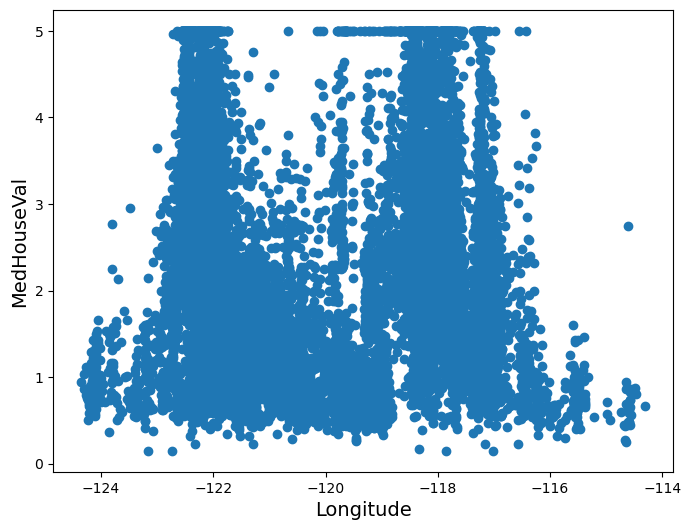

In [23]:
# 2. Select one or more explanatory variables
variables = [col for col in df.columns if col not in {'MedHouseVal'}] #taking variables other than MedHouseVal
for variable in variables:
    plt.figure(figsize=(8, 6))

    plt.scatter(df[variable], df['MedHouseVal'])
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('MedHouseVal', fontsize=14);

In [24]:
# 3. Split the data into training and testing
X, y = df[variables], df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 4. Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [32]:
# 5. Build a regression tree
full_model = tree.DecisionTreeRegressor().fit(X_train, y_train)

full_model

DecisionTreeRegressor()

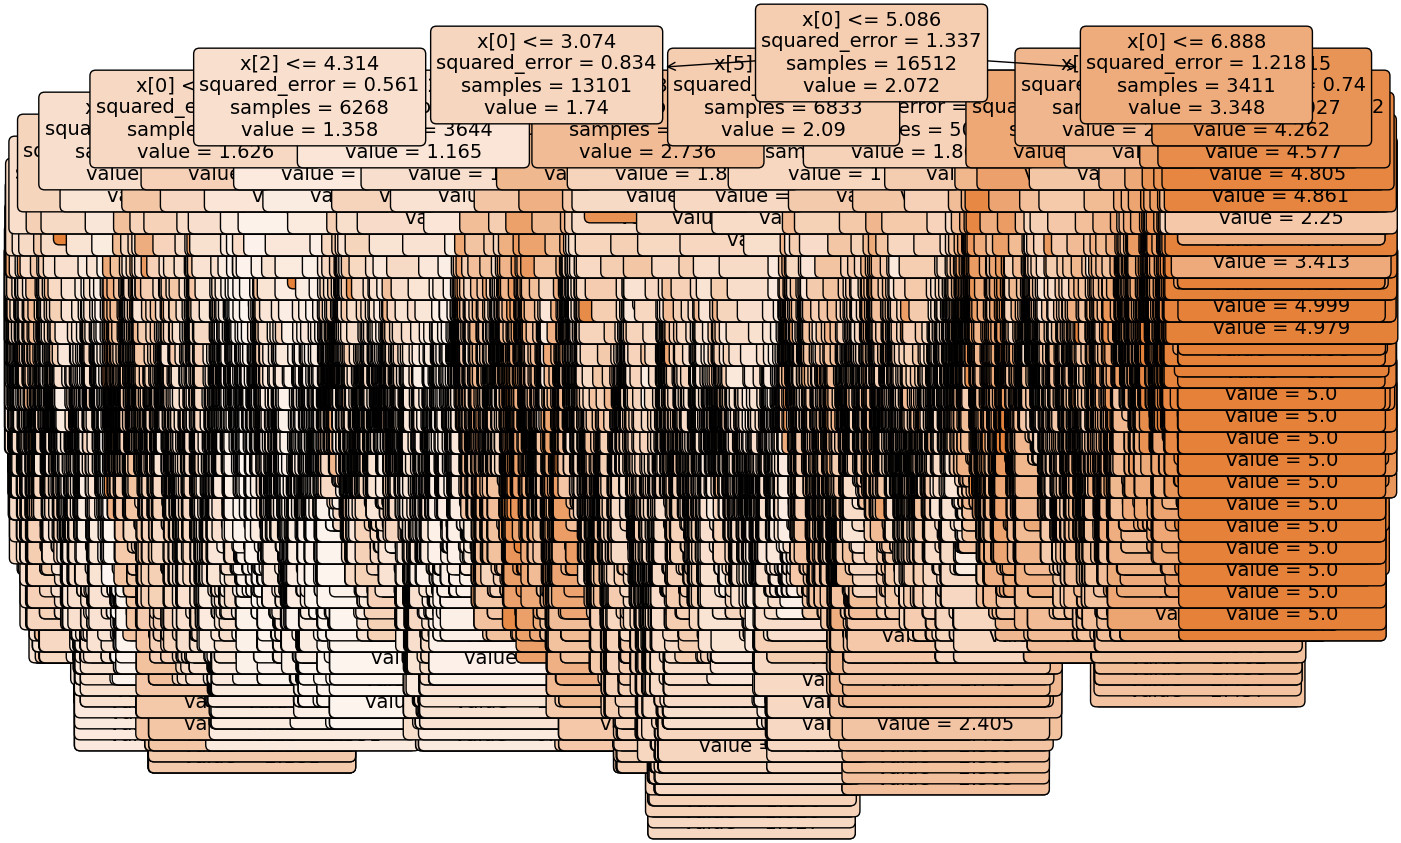

In [34]:
plt.figure(figsize=(15,10))

tree.plot_tree(full_model,
               filled=True, 
               rounded=True,
               fontsize=14);

In [30]:
# 6. Inspect evaluation measures
pd.DataFrame([
    mean_squared_error(y_test, full_model.predict(X_test)),
    mean_absolute_error(y_test, full_model.predict(X_test)),
    root_mean_squared_error(y_test, full_model.predict(X_test))
], index=['mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error'], columns=['Test Error'])

,Test Error
mean_squared_error,0.501103
mean_absolute_error,0.455999
root_mean_squared_error,0.707886


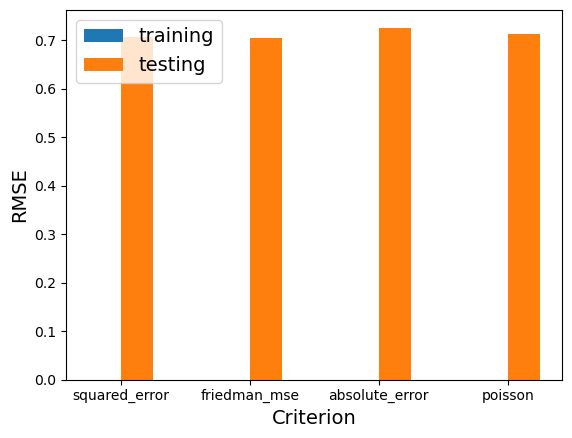

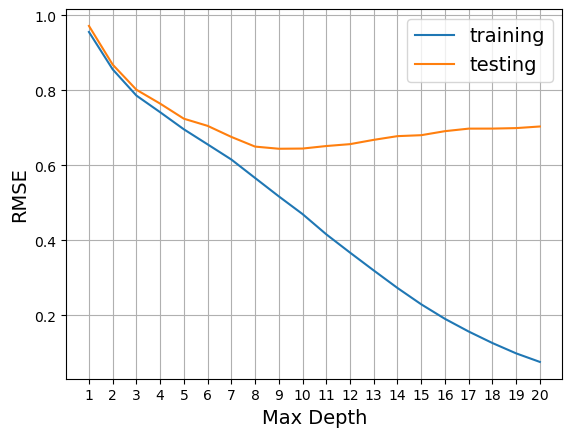

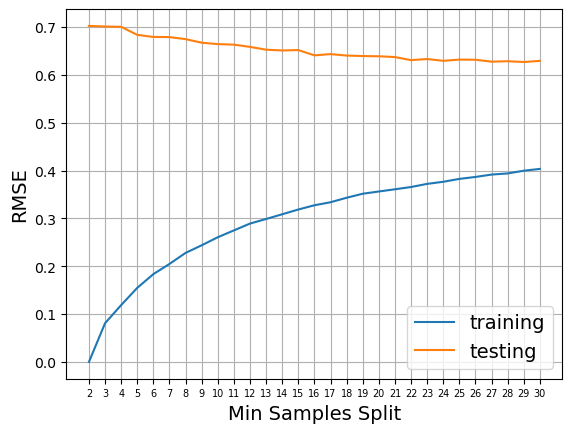

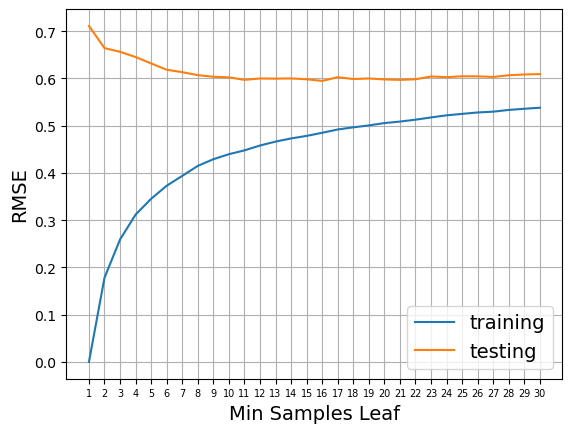

In [38]:
# 7. Modify the tree hyper-parameters
x_axis, y_axis_train, y_axis_test = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], [], []
for criterion in x_axis:
    regressor = tree.DecisionTreeRegressor(criterion=criterion).fit(X_train, y_train)
    y_axis_train.append(root_mean_squared_error(y_train, regressor.predict(X_train)))
    y_axis_test.append(root_mean_squared_error(y_test, regressor.predict(X_test)))
x_axis_helper, width = np.arange(len(x_axis)), 0.25
plt.bar(x_axis_helper - width/2, y_axis_train, width, label='training')
plt.bar(x_axis_helper + width/2, y_axis_test, width, label='testing')
plt.xlabel('Criterion', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(x_axis_helper, x_axis)
plt.legend(fontsize=14)
plt.show()

x_axis, y_axis_train, y_axis_test = range(1, 21), [], []
for max_depth in x_axis:
    regressor = tree.DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_axis_train.append(root_mean_squared_error(y_train, regressor.predict(X_train)))
    y_axis_test.append(root_mean_squared_error(y_test, regressor.predict(X_test)))
plt.plot(x_axis, y_axis_train, label='training')
plt.plot(x_axis, y_axis_test, label='testing')
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(x_axis)
plt.grid()
plt.legend(fontsize=14)
plt.show()

x_axis, y_axis_train, y_axis_test = range(2, 31), [], []
for min_samples_split in x_axis:
    regressor = tree.DecisionTreeRegressor(min_samples_split=min_samples_split).fit(X_train, y_train)
    y_axis_train.append(root_mean_squared_error(y_train, regressor.predict(X_train)))
    y_axis_test.append(root_mean_squared_error(y_test, regressor.predict(X_test)))
plt.plot(x_axis, y_axis_train, label='training')
plt.plot(x_axis, y_axis_test, label='testing')
plt.xlabel('Min Samples Split', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(x_axis, fontsize=7)
plt.grid()
plt.legend(fontsize=14)
plt.show()

x_axis, y_axis_train, y_axis_test = range(1, 31), [], []
for min_samples_leaf in x_axis:
    regressor = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
    y_axis_train.append(root_mean_squared_error(y_train, regressor.predict(X_train)))
    y_axis_test.append(root_mean_squared_error(y_test, regressor.predict(X_test)))
plt.plot(x_axis, y_axis_train, label='training')
plt.plot(x_axis, y_axis_test, label='testing')
plt.xlabel('Min Samples Leaf', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(x_axis, fontsize=7)
plt.grid()
plt.legend(fontsize=14)
plt.show()

In [44]:
# 8. Pruning

# making the tree smaller for our convenience.
path = full_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']

pruning_model = RandomizedSearchCV(
    tree.DecisionTreeRegressor(), 
    {'ccp_alpha': [alpha for alpha in ccp_alphas]},
    cv=5, scoring='neg_mean_squared_error', n_iter=100
).fit(X_train, y_train)
pruning_model.best_params_ #getting the pruning model

{'ccp_alpha': 0.0005489452818766335}

In [46]:
# 9. Compute MAE, MSE, RMSE for the pruning model
pd.DataFrame([
    mean_squared_error(y_test, pruning_model.predict(X_test)),
    mean_absolute_error(y_test, pruning_model.predict(X_test)),
    root_mean_squared_error(y_test, pruning_model.predict(X_test))
], index=['mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error'], columns=['Test Error'])

,Test Error
mean_squared_error,0.403089
mean_absolute_error,0.438128
root_mean_squared_error,0.634893


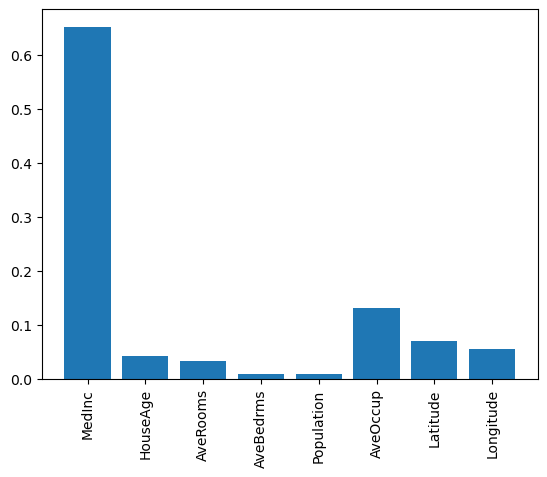

In [50]:
# 10. Determine which features are most important from the pruning model
importance = pruning_model.best_estimator_.feature_importances_
position = range(len(importance))
plt.bar(position, importance)
plt.xticks(position, variables, rotation=90)
plt.show()

### we can observe the most important variable = MedInc

### we can observe the less important variable = AveBedrms

In [52]:
# 11. Predict Median House Value
new_df = X_test.copy() #all variables except medhouseval
new_df['MedHouseVal'] = y_test  #adding the medhouseval to the data
new_df['Predicted MedHouseVal'] = pruning_model.predict(X_test) # adding the predicted medhouseval to the dataset
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Predicted MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,0.688495
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,0.864257
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,4.871595
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,2.296270
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,2.126351
...,...,...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22,2.63300,1.630451
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83,2.66800,1.235641
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05,5.00001,4.876569
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76,0.72300,0.864257


## Summary:

#### We got predicted median house values using the pruning model with random search CV. 